# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.
 
__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

In [ ]:
!pip install wandb
!pip install pytorch_lightning 
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 18.4 MB/s 
     |████████████████████████████████| 166 kB 49.7 MB/s 
     |████████████████████████████████| 182 kB 64.6 MB/s 
     |████████████████████████████████| 63 kB 887 kB/s 
     |████████████████████████████████| 166 kB 33.1 MB/s 
     |████████████████████████████████| 162 kB 57.1 MB/s 
     |████████████████████████████████| 162 kB 53.8 MB/s 
     |████████████████████████████████| 158 kB 25.4 MB/s 
     |████████████████████████████████| 157 kB 24.9 MB/s 
     |████████████████████████████████| 157 kB 1.4 MB/s 
     |████████████████████████████████| 157 kB 50.8 MB/s 
     |████████████████████████████████| 157 kB 19.7 MB/s 
     |████████████████████████████████| 157 kB 27.3 MB/s 
     |████████████████████████████████| 157 kB 8.0 MB/s 
     |████████████████████████████████| 157 kB 20.9 MB/s 
     |█████████████████████████████

In [ ]:
# # Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
import math
import os
import random
import sys
from IPython.display import clear_output
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm
import numpy
import wandb

wandb.login()
# You may add any imports you need

wandb: Currently logged in as: dubnova. Use `wandb login --relogin` to force relogin


True

In [ ]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

In [ ]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2022-11-08 16:01:44--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2022-11-08 16:01:44--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucab0331ecc654741c0adc506fa9.dl.dropboxusercontent.com/cd/0/get/BwXfl51OV5kBxHJXOLLf9itRQPT8ixo9Onhs8pt4GHWYWf5NC-V3l3EC9SPmMPz4O9_WVmTE7QUT3G1lymKjPcyPWBP6HKr9GNoRllOqNN0efsvWB9avU30ffcXc3weRUyImnXFsRf4rytbr8aNxrsGef92gE5pePg4qJCUoH9862w/file?dl=1# [following]
--2022-11-08 16:01:45--  https://ucab0331ecc654741c0adc506fa9.dl.dropboxusercontent.com/cd/0/get/BwXfl51OV5kBxHJXOLLf9itRQPT8ixo9Onhs8pt4GHWYWf5NC-V3l3EC9SPmMPz4O9_WVmTE7QUT3G1ly

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True) 

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели. 
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать: 

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали. 
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [ ]:
# YOU CAN DEFINE AUGMENTATIONS HERE
import PIL
train_transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.485, 0.456, 0.406),
                std=(0.229, 0.224, 0.225))
    ]
)
val_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.485, 0.456, 0.406),
    std=(0.229, 0.224, 0.225))
    ]
)

train_dataset = ImageFolder('./dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('./dataset/dataset/val', transform=val_transform)
train_subset = torch.utils.data.Subset(train_dataset, numpy.random.choice(len(train_dataset), 10, replace=False))
val_subset = torch.utils.data.Subset(val_dataset, numpy.random.choice(len(val_dataset), 3, replace=False))

train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=4) # YOUR CODE HERE
val_dataloader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=4) # YOUR CODE HERE


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


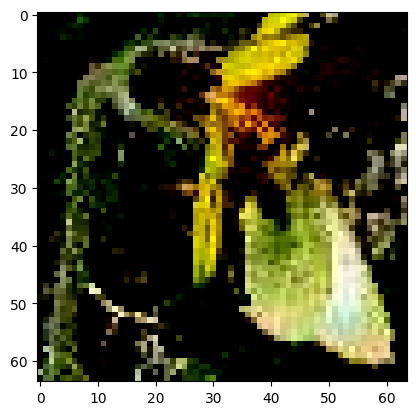

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


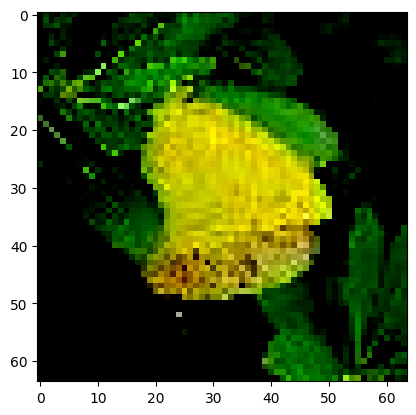

In [ ]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1. 

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

In [ ]:
def train_with_scheduler(model, criterion, optimizer, scheduler, train_dataloader, val_dataloader, n_epochs=5):
    train_loss_log, train_acc_log, val_loss_log, val_acc_log = [], [], [], []
    
    for epoch in range(n_epochs):
        # тренировка
        train_epoch_loss, train_epoch_true_hits = torch.empty(0), torch.empty(0)
        model.train()
        for imgs, labels in tqdm(train_dataloader, desc=f"Training, epoch {epoch}", leave=False):
            imgs, labels = imgs.to(device), labels.to(device)
            
            y_pred = model(imgs)
            loss = criterion(y_pred, labels)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            # log loss for the current epoch and the whole training history
            train_epoch_loss = torch.cat((train_epoch_loss, loss.cpu().unsqueeze(0) / labels.cpu().size(0)))
            train_loss_log.append(loss.cpu().data / labels.cpu().size(0))

            # log accuracy for the current epoch and the whole training history
            pred_classes = torch.argmax(y_pred.cpu(), dim=-1)
            train_epoch_true_hits = torch.cat((
                train_epoch_true_hits, 
                (pred_classes == labels.cpu()).sum().unsqueeze(0)
            ))
            train_acc_log.append((pred_classes == labels.cpu()).sum() / labels.cpu().shape[0])


        # валидация
        val_epoch_loss, val_epoch_true_hits = torch.empty(0), torch.empty(0)
        model.eval()
        with torch.no_grad():
            for imgs, labels in tqdm(val_dataloader, desc=f"Validating, epoch {epoch}", leave=False):
                imgs, labels = imgs.to(device), labels.to(device)
                
                y_pred = model(imgs)
                loss = criterion(y_pred, labels)
                val_epoch_loss = torch.cat((val_epoch_loss, loss.cpu().unsqueeze(0) / labels.cpu().size(0)))

                pred_classes = torch.argmax(y_pred.cpu(), dim=-1)
                val_epoch_true_hits = torch.cat((
                    val_epoch_true_hits,
                    (pred_classes == labels.cpu()).sum().unsqueeze(0)
                ))
        
        
        val_loss_log.append(val_epoch_loss.mean())
        val_acc_log.append(val_epoch_true_hits.sum() / val_epoch_true_hits.size(0) / val_dataloader.batch_size)
        scheduler.step()
        print(f"\nEPOCH {epoch}")
        print("Train loss:", train_epoch_loss.mean().item())
        print(
            "Train acc:", 
            (train_epoch_true_hits.sum() / train_epoch_true_hits.size(0) / train_dataloader.batch_size).item()
        )
        print("Val loss:", val_epoch_loss.mean().item())
        print(
            "Val acc:", 
            (val_epoch_true_hits.sum() / val_epoch_true_hits.size(0) / val_dataloader.batch_size).item()
        )

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [ ]:
# BEST TASK 1
seed_everything(13)
my_model = torchvision.models.densenet161(pretrained=False, num_classes=200).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(my_model.parameters(), lr=0.001) #weight decay = 0.01
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 15, 0.4)
train_with_scheduler(my_model, criterion, optimizer, scheduler, train_dataloader, val_dataloader, n_epochs=8)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



EPOCH 0
Train loss: 0.01650972291827202
Train acc: 0.11500959098339081
Val loss: 0.030347056686878204
Val acc: 0.1845332235097885



EPOCH 1
Train loss: 0.012886814773082733
Train acc: 0.24681305885314941
Val loss: 0.026969149708747864
Val acc: 0.2616693079471588



EPOCH 2
Train loss: 0.011228729970753193
Train acc: 0.3236892521381378
Val loss: 0.023674193769693375
Val acc: 0.32960838079452515



EPOCH 3
Train loss: 0.009849335066974163
Train acc: 0.39153411984443665
Val loss: 0.022487379610538483
Val acc: 0.36372625827789307



EPOCH 4
Train loss: 0.008793540298938751
Train acc: 0.44453325867652893
Val loss: 0.022199882194399834
Val acc: 0.383405864238739



EPOCH 5
Train loss: 0.00775865325704217
Train acc: 0.5005894303321838
Val loss: 0.02137705683708191
Val acc: 0.41287580132484436



EPOCH 6
Train loss: 0.006735017988830805
Train acc: 0.5543078780174255
Val loss: 0.01934981532394886
Val acc: 0.43176424503326416



EPOCH 7
Train loss: 0.005743613466620445
Train acc: 0.6101742386817932
Val loss: 0.019917597994208336
Val acc: 0.44026899337768555


### Валидация результатов задания

In [ ]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    predicted_classes = torch.Tensor([]).to(device)
    true_classes = torch.Tensor([]).to(device)

    model.eval()
    with torch.no_grad():
        for images, labels in tqdm(test_dataloader):
            images, labels = images.to(device), labels.to(device)

            pred = model(images)
            pred_classes = torch.argmax(pred, dim=-1)

            predicted_classes = torch.cat((predicted_classes, pred_classes), 0)
            true_classes = torch.cat((true_classes, labels), 0)

    return accuracy_score(predicted_classes.cpu().detach().numpy(), true_classes.cpu().detach().numpy())

In [ ]:
model = my_model
accuracy = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * accuracy / 0.44, 0, 10):.2f} баллов, acc = {accuracy}")

100%|██████████| 79/79 [00:10<00:00,  7.51it/s]

Оценка за это задание составит 10.00 баллов, acc = 0.4452


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

In [ ]:
# YOU CAN DEFINE AUGMENTATIONS HERE
import PIL
train_transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.Resize(size=(256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.485, 0.456, 0.406),
                std=(0.229, 0.224, 0.225))
    ]
)
val_transform = transforms.Compose(
    [
        transforms.Resize(size=(256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.485, 0.456, 0.406),
    std=(0.229, 0.224, 0.225))
    ]
)


train_dataset = ImageFolder('./dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('./dataset/dataset/val', transform=val_transform)
train_subset = torch.utils.data.Subset(train_dataset, numpy.random.choice(len(train_dataset), 10, replace=False))
val_subset = torch.utils.data.Subset(val_dataset, numpy.random.choice(len(val_dataset), 3, replace=False))

train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)
val_dataloader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=4) 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
class MyEffNet(pl.LightningModule):
    def __init__(self, pretrained=True, graph_name='') -> None:
        super().__init__()
        self.pretrained = pretrained
        self.name = graph_name
        if pretrained:
          self.model = torchvision.models.efficientnet_b4(pretrained=True)
          self.model.classifier = nn.Identity()
          self.classifier = nn.Sequential(
            nn.Dropout(p=0.4, inplace=True),
            nn.Linear(in_features=1792, out_features=200, bias=True)
            )
          self.optimizer = torch.optim.AdamW(self.classifier.parameters())
        else:
          self.model = torchvision.models.efficientnet_b1(pretrained=False)
          self.classifier = nn.Sequential(
              nn.Dropout(p=0.4, inplace=True),
              nn.Linear(in_features=1280, out_features=200, bias=True))
          self.optimizer = torch.optim.AdamW(self.model.parameters(), lr = 0.0001)
        self.loss = nn.CrossEntropyLoss()

    def forward(self, x) -> torch.Tensor:
      if self.pretrained:
        with torch.no_grad():
            features = self.model(x)
        preds = self.classifier(features)
      else:
        features = self.model(x)
        preds = self.classifier(features)
      # self.scheduler.step()
      return preds

    def configure_optimizers(self):
        return self.optimizer

    def training_step(self, train_batch, batch_idx) -> torch.Tensor:
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log(f"train_loss {self.name}", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx) -> None:
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long())
        self.log(f"val_loss {self.name}", loss, prog_bar=True)
        self.log(f"accuracy {self.name}", acc, on_epoch=True, prog_bar=True)

In [ ]:
wandb_logger = WandbLogger()

In [ ]:
seed_everything(13)
my_model = MyEffNet(pretrained=True, graph_name="B4 AdamW default 256x256")
trainer = pl.Trainer(accelerator="gpu", max_epochs=8, logger=wandb_logger)
trainer.fit(my_model, train_dataloader, val_dataloader)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=EfficientNet_B4_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B4_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU avail

Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=8` reached.


#### Верхнюю ячейку я скопировала из другой тетрадки, где все черновые прогоны и вычисления. При переносе в финальную версию (сюда) вывод ячейки сохранился не оч, но вот скрин из другой тетрадки:

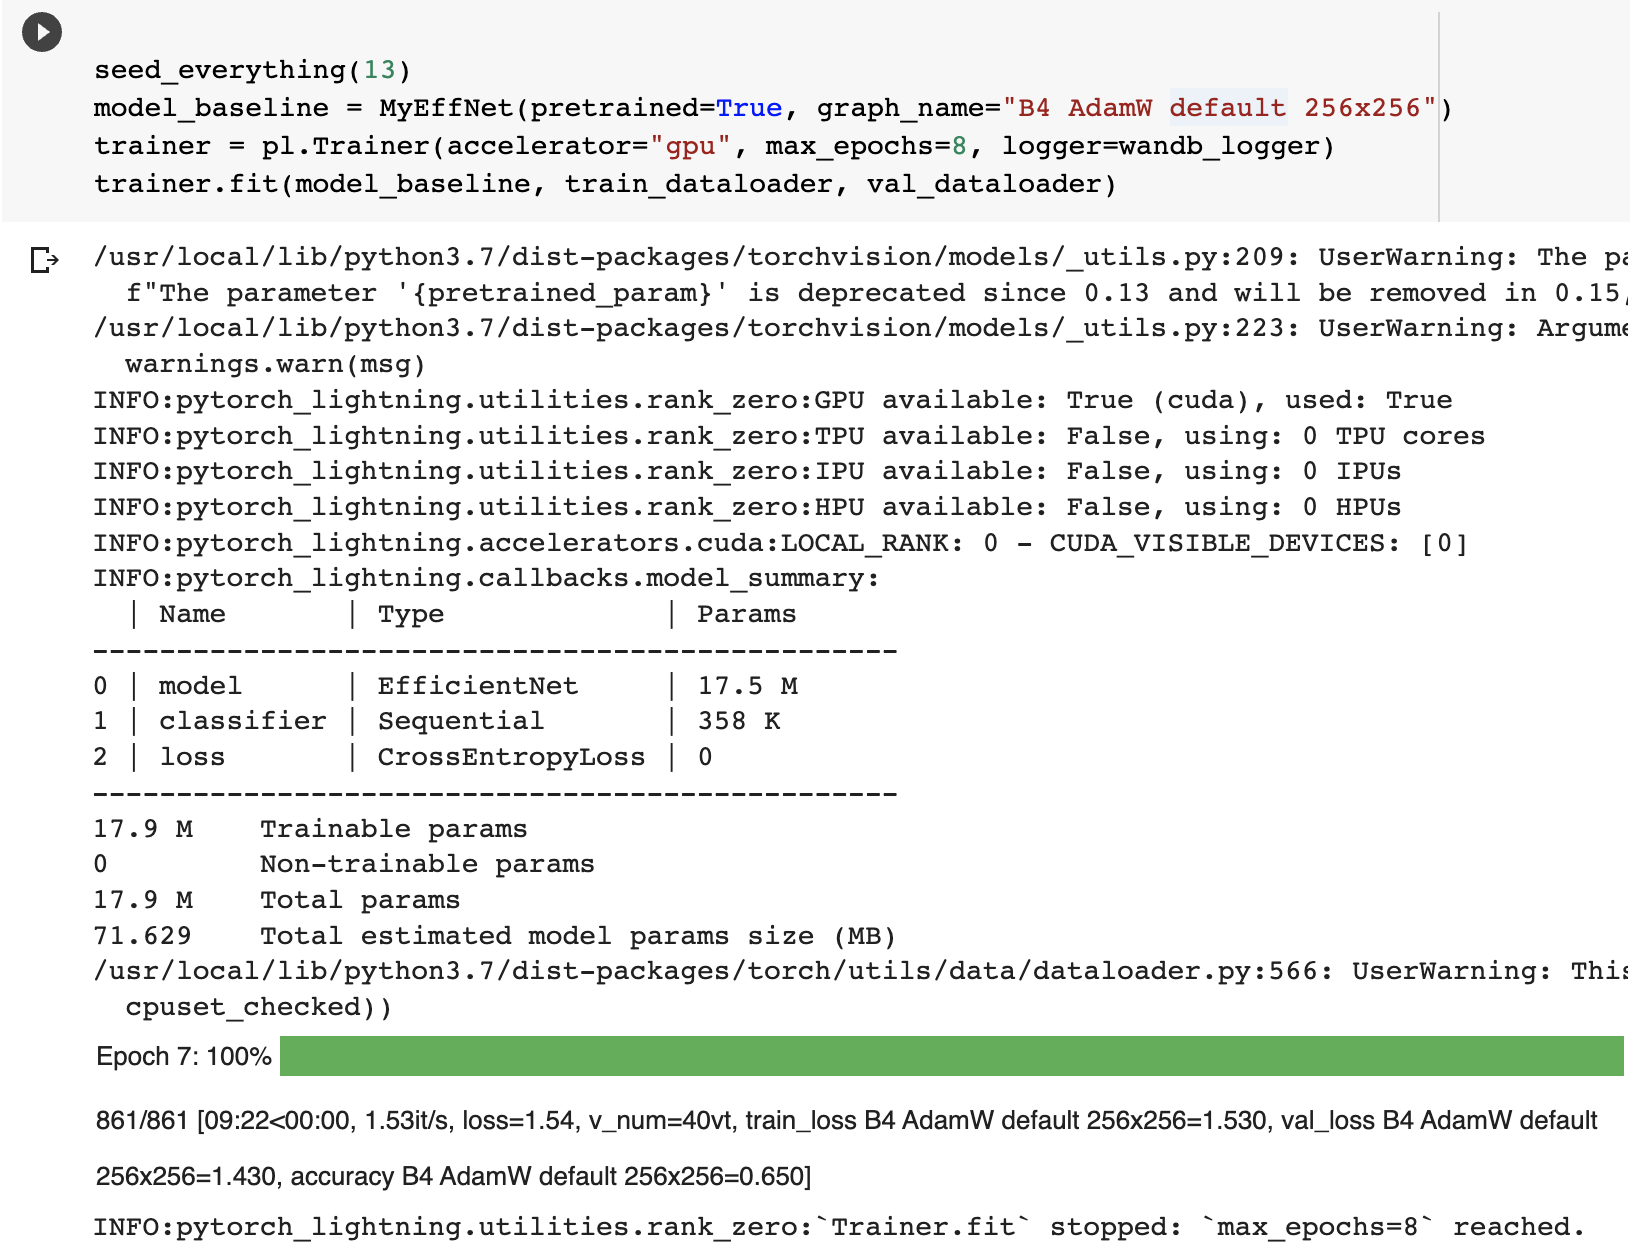

### Валидация результатов задания

In [ ]:
model = my_model

accuracy = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * (accuracy - 0.5) / 0.34, 0, 10):.2f} баллов, accuracy = {accuracy}")

100%|██████████| 79/79 [00:44<00:00,  1.77it/s]

Оценка за это задание составит 4.41 баллов, accuracy = 0.6498


# Отчёт об экспериментах 

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

### Задание 1
Я решила импортировать непредобученную модель, и крутила параметры всего вокруг. Если кратко, то: 
- сначала попробовала разные **Resnet'ы,** качество было лучше у Resnet18, и училась она быстро. Я поняла, что на ней до 0.44 не дотяну, но на ней было удобно смотреть влияние других параметров на качество обучения. Так что дальше довольно долга тестила все на ней
- **Adam:** пробовала разные **lr и weight_decay**, в разных комбинациях друг с другом. Лучше всего получалось с lr ~ 0.001, w_d~0.0001
- **SGD**: попробовала около семи разных значений **momentum, от 10^(-1) до 10^(-5),** сравнивала их результаты за 3 эпохи. Adam все равно показывал лучше результаты. В итоге вернулась к AdamW, который хорошо себя зарекомендовал еще в первом дз. В нем правильно реализован weight_decay, и его дефолтное значение и на этом дз дало хорошие резы
- **Schedulers**: тоже перепробовала **LambdaLR, StepLr, MultiLr**, и в них различные параметры. Для LambdaLR качество было лучше при мЕньшем коэффициенте: 0.6 * epoch >> 0.95 * epoch, но все равно хуже чем при StepLr. 
- Разный размер батча, но при > 128 быстро заканчивалась память, так что вернулась на 128. 
- Аугментации. Сначала пробовала сразу много, но качество было плохим, видимо из-за размера картинки слишком много изменений ее портило. Коэффициенты нормализации взяла из дефолтной нормализации albumentations

Когда пришла к оптимальному набору гиперпараметров, перешла на **DenseNet121**. Качество сразу получилось хорошее, но чуть чуть не дотягивало до 0.44. Тянуть на много-много эпох не хотела, так что взяла DenseNet161, и получила нужное

### Задание 2

у меня к сожалению по разным обстоятельствам было сильно меньше времени, которое я могла потратить на это дз, поэтому эксперименты в основном так же вертелись к сожалению только вокруг прокрутки гиперпараметров, а не экспериментов со слоями обучения. 

- сначала попробовала все знакомые из первой части задания модели, но уже предобученные. они не оч хорошие резы давали, поэтому вышла на EfficientNet. Попробовала все b1-5))) Лучше всего зашла b4

- пробовала разный ресайз - от 32х32 до 256х256. Чем меньше картинка, тем хуже качество

- крутила аугментации, но вывод в тот же , что и в первом задании - с ними тут слишком легко переборщить и ухудшить качество

- пробовала изменить classifier изначальной EfficientNet_b4, сделать его многослойным, но качество с теми гиперапарметрами, которые я подставила, только ухудшалось

- снова крутила оптимайзеры, смотрела разные Schedulers, но сильно качество никто не бустил

Понимаю, что надо было бы просто обучать больше слоев под свою модель.
